### The Challenge
    - The sinking of the Titanic is one of the most infamous shipwrecks in history.

    - On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

    - While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

    - In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [66]:
# import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [67]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
gender = pd.read_csv('gender_submission.csv')

### Explore the data

In [68]:
# test set
test.tail(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [69]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
gender.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Data Manipulation 

In [71]:
# train set
train = train[ ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age'] ]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0


In [72]:
#test set
test = test[ ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age'] ]
test.head()

,PassengerId,Pclass,Name,Sex,Age
0,892,3,"Kelly, Mr. James",male,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0
3,895,3,"Wirz, Mr. Albert",male,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0


In [73]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
dtype: object

In [74]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
dtype: object

In [75]:
train.corr()

,PassengerId,Survived,Pclass,Age
PassengerId,1.000000,-0.005007,-0.035144,0.036847
Survived,-0.005007,1.000000,-0.338481,-0.077221
Pclass,-0.035144,-0.338481,1.000000,-0.369226
Age,0.036847,-0.077221,-0.369226,1.000000


In [76]:
test.corr()

,PassengerId,Pclass,Age
PassengerId,1.000000,-0.026751,-0.034102
Pclass,-0.026751,1.000000,-0.492143
Age,-0.034102,-0.492143,1.000000


### visualization

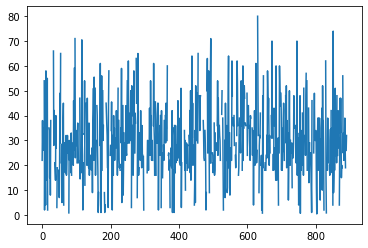

In [77]:


plt.plot(train['Age'], label = 'The sex of the passengers')

### Feature Selection

In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = train.iloc[:,0:3]
Y = train.iloc[:,1]

best_features = SelectKBest(score_func=chi2, k ='all')
fit = best_features.fit(X, Y)

In [79]:
train_data_scores = pd.DataFrame(fit.scores_)
train_data_columns = pd.DataFrame(X.columns)

features_train = pd.concat([train_data_columns, train_data_scores], axis = 1)
features_train.columns = ['All', 'Survived']
features_train

,All,Survived
0,PassengerId,3.312934
1,Survived,549.000000
2,Pclass,30.873699


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = train[['PassengerId', 'Survived']]
Y = train[['Survived']]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=100)
log = LogisticRegression()
log.fit(X_train, y_train)

/home/sk33p34/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
X_test.head()

In [81]:
y_pred = log.predict(X_test)
X_test.head()
# print(y_pred)

,PassengerId,Survived
205,206,0
44,45,1
821,822,1
458,459,1
795,796,0


In [87]:
import csv
with open('gender_csv.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=X_test.columns)
   
 

AttributeError: 'str' object has no attribute 'keys'

In [83]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred, zero_division=1))
print('Precision: ', metrics.precision_score(y_test, y_pred, zero_division=1))
print('CL Report: ',metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy: 1.0
Recall:  1.0
Precision:  1.0
CL Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        75

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

